## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
icml_data = pd.read_csv('/content/drive/MyDrive/data/icml_face_data.csv')
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [4]:
icml_data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [6]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
print(test.shape)
print(train.shape)
print(icml_data.shape)

(7178, 1)
(28709, 2)
(35887, 3)


In [8]:
icml_data.rename(columns = {' pixels':'pixels', ' Usage':'usage'}, inplace = True)

In [9]:
icml_data.columns

Index(['emotion', 'usage', 'pixels'], dtype='object')

# EDA

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  7178 non-null   object
dtypes: object(1)
memory usage: 56.2+ KB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [12]:
icml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   usage    35887 non-null  object
 2   pixels   35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [13]:
emotion = {0:'Angry', 
           1:'Disgust', 
           2:'Fear', 
           3:'Happy', 
           4:'Sad', 
           5:'Surprised', 
           6:'Neutral'}

emotion_graph = ['Angry', 
           'Disgust', 
           'Fear', 
           'Happy', 
           'Sad', 
           'Surprised', 
           'Neutral']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgust'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprised'),
 Text(0, 0, 'Neutral')]

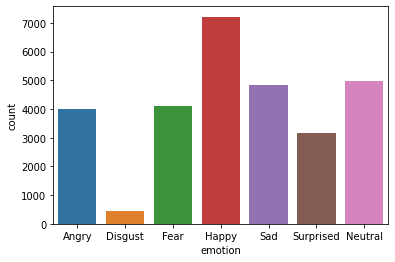

In [14]:
plot = sns.countplot(train['emotion'])

plot.set_xticklabels(emotion_graph)

In [15]:
train['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [33]:
y = train['emotion']
y.shape

(28709,)

In [34]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
labels = LE.fit_transform(y)
labels = to_categorical(labels)
labels.shape

(28709, 7)

In [35]:
y_train = labels

X_train = train['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))

X_train = np.stack(X_train, axis = 0)
X_train.shape

(28709, 48, 48, 1)

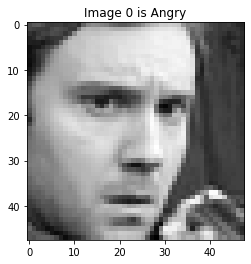

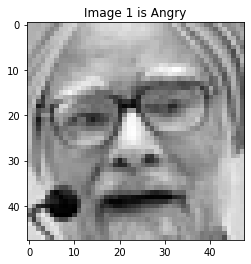

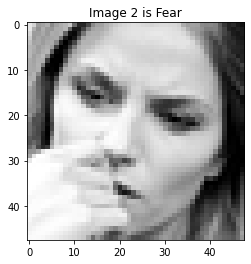

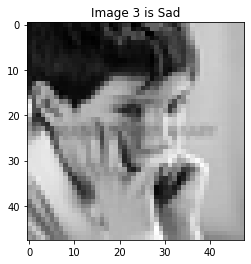

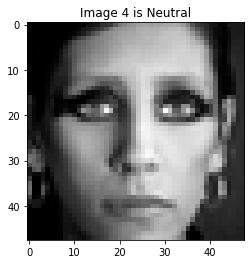

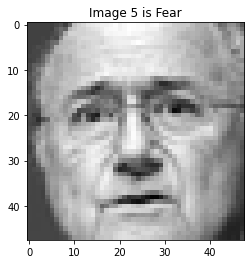

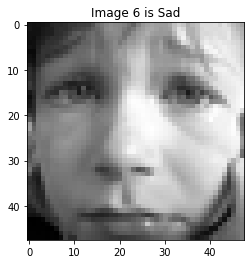

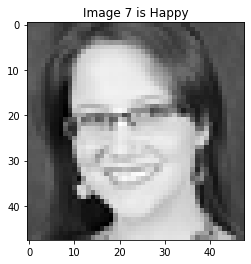

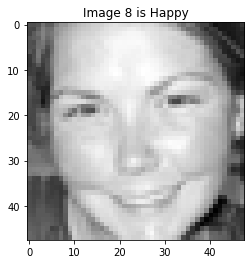

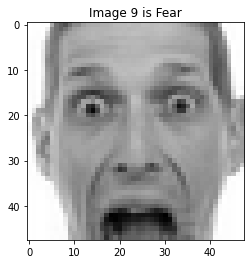

In [36]:
for i in range(10):
  plt.figure()

  plt.imshow(X_train[i].reshape((48,48)), cmap='gray')
  
  item = y_train[i].argmax(axis = 0)
  image = emotion[item]
  plt.title('Image %d is %s' % (i, image))

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
num_class = 7
batch_size = 50
epochs = 20

In [39]:
model = keras.Sequential(name = 'Final_Project')

model.add(layers.Conv2D(32, kernel_size = (3, 3), 
                        activation = 'relu', 
                        input_shape = (48, 48, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "Final_Project"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 3200)            

In [40]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/20


ValueError: ignored